##### Part 1: Data Pre Processing

In [1]:
import pyspark
import numpy as np
import pandas as pd
from pyspark.sql import SparkSession

In [434]:
spark = SparkSession.builder \
    .appName("Data Analysis") \
    .config("spark.executor.heartbeatInterval", "60s") \
    .config("spark.network.timeout", "600s") \
    .getOrCreate()

In [3]:
# Importing Tables
Dim_Customer = spark.read.csv("C:\\Users\\Chuka\\Downloads\\Dataset_Final\\DataSet_final\\DimCustomer.csv",inferSchema = True, header = True)
Fact_internet_sales = spark.read.csv("C:\\Users\\Chuka\\Downloads\\Dataset_Final\\DataSet_final\\FactInternetSales.csv",inferSchema = True, header = True)
Products = spark.read.csv("C:\\Users\\Chuka\\Downloads\\Dataset_Final\\DataSet_final\\DimProduct.csv", header = True)

In [4]:
Dim_Customer.show(3)
Fact_internet_sales.show(3)
Products.show(3)

+-----------+------------+--------------------+-----+---------+----------+--------+---------+----------+-------------+------+------+--------------------+------------+-------------+--------------------+----------------+----------------+---------------+-----------------+-----------------+----------------+--------------+---------------+----------------+------------+-------------------+-----------------+---------------+
|CustomerKey|GeographyKey|CustomerAlternateKey|Title|FirstName|MiddleName|LastName|NameStyle| BirthDate|MaritalStatus|Suffix|Gender|        EmailAddress|YearlyIncome|TotalChildren|NumberChildrenAtHome|EnglishEducation|SpanishEducation|FrenchEducation|EnglishOccupation|SpanishOccupation|FrenchOccupation|HouseOwnerFlag|NumberCarsOwned|    AddressLine1|AddressLine2|              Phone|DateFirstPurchase|CommuteDistance|
+-----------+------------+--------------------+-----+---------+----------+--------+---------+----------+-------------+------+------+--------------------+-------

In [29]:
Dim_Customer.printSchema()

root
 |-- CustomerKey: integer (nullable = true)
 |-- GeographyKey: integer (nullable = true)
 |-- CustomerAlternateKey: string (nullable = true)
 |-- Title: string (nullable = true)
 |-- FirstName: string (nullable = true)
 |-- MiddleName: string (nullable = true)
 |-- LastName: string (nullable = true)
 |-- NameStyle: boolean (nullable = true)
 |-- BirthDate: string (nullable = true)
 |-- MaritalStatus: string (nullable = true)
 |-- Suffix: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- EmailAddress: string (nullable = true)
 |-- YearlyIncome: integer (nullable = true)
 |-- TotalChildren: integer (nullable = true)
 |-- NumberChildrenAtHome: integer (nullable = true)
 |-- EnglishEducation: string (nullable = true)
 |-- SpanishEducation: string (nullable = true)
 |-- FrenchEducation: string (nullable = true)
 |-- EnglishOccupation: string (nullable = true)
 |-- SpanishOccupation: string (nullable = true)
 |-- FrenchOccupation: string (nullable = true)
 |-- HouseOwn

In [30]:
Fact_internet_sales.printSchema()

root
 |-- ProductKey: integer (nullable = true)
 |-- OrderDateKey: integer (nullable = true)
 |-- DueDateKey: integer (nullable = true)
 |-- ShipDateKey: integer (nullable = true)
 |-- CustomerKey: integer (nullable = true)
 |-- PromotionKey: integer (nullable = true)
 |-- CurrencyKey: integer (nullable = true)
 |-- SalesTerritoryKey: integer (nullable = true)
 |-- SalesOrderNumber: string (nullable = true)
 |-- SalesOrderLineNumber: integer (nullable = true)
 |-- RevisionNumber: integer (nullable = true)
 |-- OrderQuantity: integer (nullable = true)
 |-- UnitPrice: double (nullable = true)
 |-- ExtendedAmount: double (nullable = true)
 |-- UnitPriceDiscountPct: integer (nullable = true)
 |-- DiscountAmount: integer (nullable = true)
 |-- ProductStandardCost: double (nullable = true)
 |-- TotalProductCost: double (nullable = true)
 |-- SalesAmount: double (nullable = true)
 |-- TaxAmt: double (nullable = true)
 |-- Freight: double (nullable = true)
 |-- CarrierTrackingNumber: string (n

In [27]:
# Spark default read.csv load dtype is string if inferSchema is False as below
Products.printSchema()

root
 |-- ProductKey: string (nullable = true)
 |-- ProductAlternateKey: string (nullable = true)
 |-- ProductSubcategoryKey: string (nullable = true)
 |-- WeightUnitMeasureCode: string (nullable = true)
 |-- SizeUnitMeasureCode: string (nullable = true)
 |-- EnglishProductName: string (nullable = true)
 |-- SpanishProductName: string (nullable = true)
 |-- FrenchProductName: string (nullable = true)
 |-- StandardCost: string (nullable = true)
 |-- FinishedGoodsFlag: string (nullable = true)
 |-- Color: string (nullable = true)
 |-- SafetyStockLevel: string (nullable = true)
 |-- ReorderPoint: string (nullable = true)
 |-- ListPrice: string (nullable = true)
 |-- Size: string (nullable = true)
 |-- SizeRange: string (nullable = true)
 |-- Weight: string (nullable = true)
 |-- DaysToManufacture: string (nullable = true)
 |-- ProductLine: string (nullable = true)
 |-- DealerPrice: string (nullable = true)
 |-- Class: string (nullable = true)
 |-- Style: string (nullable = true)
 |-- Mode

In [4]:
# Changing neccessary columns to numeric dtype
from pyspark.sql.types import IntegerType, FloatType, DoubleType
from pyspark.sql.functions import col,count,isnan, when, lit
int_columns = ['ProductKey','ProductSubcategoryKey','SafetyStockLevel','ReorderPoint']

for column_name in int_columns:
    Products = Products.withColumn(column_name, col(column_name).cast(IntegerType()))

In [5]:
from pyspark.sql.types import DoubleType
double_columns = ['StandardCost', 'ListPrice']
for column in double_columns:
    Products = Products.withColumn(column, col(column).cast(DoubleType()))

In [41]:
    Products.printSchema()

root
 |-- ProductKey: integer (nullable = true)
 |-- ProductAlternateKey: string (nullable = true)
 |-- ProductSubcategoryKey: integer (nullable = true)
 |-- WeightUnitMeasureCode: string (nullable = true)
 |-- SizeUnitMeasureCode: string (nullable = true)
 |-- EnglishProductName: string (nullable = true)
 |-- SpanishProductName: string (nullable = true)
 |-- FrenchProductName: string (nullable = true)
 |-- StandardCost: double (nullable = true)
 |-- FinishedGoodsFlag: string (nullable = true)
 |-- Color: string (nullable = true)
 |-- SafetyStockLevel: integer (nullable = true)
 |-- ReorderPoint: integer (nullable = true)
 |-- ListPrice: double (nullable = true)
 |-- Size: string (nullable = true)
 |-- SizeRange: string (nullable = true)
 |-- Weight: string (nullable = true)
 |-- DaysToManufacture: string (nullable = true)
 |-- ProductLine: string (nullable = true)
 |-- DealerPrice: string (nullable = true)
 |-- Class: string (nullable = true)
 |-- Style: string (nullable = true)
 |-- 

In [5]:
print(f"Dim_Customer count of rows: {Dim_Customer.count()}, Fact_internet_sales count of rows: {Fact_internet_sales.count()}, Products count of rows: {Products.count()}")

Dim_Customer count of rows: 18484, Fact_internet_sales count of rows: 60398, Products count of rows: 606


In [14]:
# Iterate through DF columns, to check and count all null values
for column_name in Dim_Customer.columns:
    null_count = Dim_Customer.filter(col(column_name).isNull()).count()
    print(f"{column_name}: {null_count}")

CustomerKey: 0
GeographyKey: 0
CustomerAlternateKey: 0
Title: 18383
FirstName: 0
MiddleName: 7830
LastName: 0
NameStyle: 0
BirthDate: 0
MaritalStatus: 0
Suffix: 18481
Gender: 0
EmailAddress: 0
YearlyIncome: 0
TotalChildren: 0
NumberChildrenAtHome: 0
EnglishEducation: 0
SpanishEducation: 0
FrenchEducation: 0
EnglishOccupation: 0
SpanishOccupation: 0
FrenchOccupation: 0
HouseOwnerFlag: 0
NumberCarsOwned: 0
AddressLine1: 0
AddressLine2: 18172
Phone: 0
DateFirstPurchase: 0
CommuteDistance: 0


In [6]:
# Dropping Null columns that have overly higher percentage of the values missing.
drop_columns = Dim_Customer.drop('Title','MiddleName','Suffix','AddressLine2')

In [33]:
# Checking for NUll values using Select; Method 2
drop_columns.select([count(when(col(c).isNull(),c)).alias(c) for c in drop_columns.columns]).show()

+-----------+------------+--------------------+---------+--------+---------+---------+-------------+------+------------+------------+-------------+--------------------+----------------+----------------+---------------+-----------------+-----------------+----------------+--------------+---------------+------------+-----+-----------------+---------------+
|CustomerKey|GeographyKey|CustomerAlternateKey|FirstName|LastName|NameStyle|BirthDate|MaritalStatus|Gender|EmailAddress|YearlyIncome|TotalChildren|NumberChildrenAtHome|EnglishEducation|SpanishEducation|FrenchEducation|EnglishOccupation|SpanishOccupation|FrenchOccupation|HouseOwnerFlag|NumberCarsOwned|AddressLine1|Phone|DateFirstPurchase|CommuteDistance|
+-----------+------------+--------------------+---------+--------+---------+---------+-------------+------+------------+------------+-------------+--------------------+----------------+----------------+---------------+-----------------+-----------------+----------------+--------------+--

In [7]:
# Reassigning DF back to initial table name
Dim_Customer = drop_columns

In [9]:
for column_name in Fact_internet_sales.columns:
    null_count = Fact_internet_sales.filter(col(column_name).isNull()).count()
    print(f"{column_name}: {null_count}")

ProductKey: 0
OrderDateKey: 0
DueDateKey: 0
ShipDateKey: 0
CustomerKey: 0
PromotionKey: 0
CurrencyKey: 0
SalesTerritoryKey: 0
SalesOrderNumber: 0
SalesOrderLineNumber: 0
RevisionNumber: 0
OrderQuantity: 0
UnitPrice: 0
ExtendedAmount: 0
UnitPriceDiscountPct: 0
DiscountAmount: 0
ProductStandardCost: 0
TotalProductCost: 0
SalesAmount: 0
TaxAmt: 0
Freight: 0
CarrierTrackingNumber: 0
CustomerPONumber: 0
OrderDate: 0
DueDate: 0
ShipDate: 0


In [15]:
# Check for null values
for column_name in Products.columns:
    null_count = Products.filter(col(column_name).isNull()).count()
    print(f"{column_name}: {null_count}")

ProductKey: 0
ProductAlternateKey: 0
ProductSubcategoryKey: 0
WeightUnitMeasureCode: 324
SizeUnitMeasureCode: 353
EnglishProductName: 0
SpanishProductName: 287
FrenchProductName: 287
StandardCost: 211
FinishedGoodsFlag: 0
Color: 0
SafetyStockLevel: 0
ReorderPoint: 0
ListPrice: 211
Size: 307
SizeRange: 0
Weight: 324
DaysToManufacture: 0
ProductLine: 226
DealerPrice: 211
Class: 276
Style: 305
ModelName: 209
EnglishDescription: 210
StartDate: 0
EndDate: 406
Status: 200


In [7]:
# Fill expected numerical Null values with Imputer for 
from pyspark.ml.feature import Imputer
imputer = Imputer(strategy="mean", inputCols=["StandardCost", "ListPrice"], outputCols=["StandardCost", "ListPrice"])
imputed = imputer.fit(Products).transform(Products)

In [8]:
# For categoricalcolumsn with null vales with value "NULL"
columnNames = ["WeightUnitMeasureCode", "SizeUnitMeasureCode", "SpanishProductName", "FrenchProductName", 
               "Size", "Weight", "ProductLine", "DealerPrice", "Class", "Style", "ModelName", "EnglishDescription", 
              "EndDate", "Status"]
for column in columnNames:
    Products = imputed.withColumn(column, when(col(column).isNull(), lit('N/A')).otherwise(col(column)))

In [29]:
# Recheck if null values are resolved
for column_name in Products.columns:
    null_count = Products.filter(col(column_name).isNull()).count()
    print(f"{column_name}: {null_count}")

ProductKey: 0
ProductAlternateKey: 0
ProductSubcategoryKey: 0
WeightUnitMeasureCode: 0
SizeUnitMeasureCode: 0
EnglishProductName: 0
SpanishProductName: 0
FrenchProductName: 0
StandardCost: 0
FinishedGoodsFlag: 0
Color: 0
SafetyStockLevel: 0
ReorderPoint: 0
ListPrice: 0
Size: 0
SizeRange: 0
Weight: 0
DaysToManufacture: 0
ProductLine: 0
DealerPrice: 0
Class: 0
Style: 0
ModelName: 0
EnglishDescription: 0
StartDate: 0
EndDate: 0
Status: 0


In [12]:
# Creating a join of DimCustomer and FactInternetSales tables on CustomerKey
df_join = Dim_Customer.join(Fact_internet_sales,Dim_Customer.CustomerKey == Fact_internet_sales.CustomerKey, "inner")

In [14]:
# Creating a further join on ProductKey to include EnglishProductName column from DimProducts table 
df_join2 = df_join.join(Products.select("ProductKey","EnglishProductName"), on = "ProductKey", how = "inner")

In [42]:
print(len(df_join.columns))

51


In [43]:
print(len(df_join2.columns))

52


In [12]:
df_join2.count()

60398

In [13]:
# Checking for any duplicates rows and drop
df_join2_no_duplicates = df_join2.dropDuplicates()

In [14]:
# Count of rows is equal; no duplicate rows
df_join2_no_duplicates.count()

60398

##### Part 2: Exploratory Data Analysis

In [15]:
# Drop one join key column to avoid ambigous reference error
df_join2 = df_join2.drop(Fact_internet_sales["customerkey"])

In [46]:
# Using SQL statement to view record for customer ID 11000  
df_join2.createOrReplaceTempView("customer")
result = spark.sql("""
    SELECT CustomerKey,
           AVG(YearlyIncome) AS Mean_YearlyIncome,
           AVG(TotalChildren) AS Mean_TotalChildren,
           AVG(NumberChildrenAtHome) AS Mean_NumberChildrenAtHome,
           AVG(NumberCarsOwned) AS Mean_NumberCarsOwned,
           AVG(ProductKey) AS Mean_ProductKey,
           AVG(PromotionKey) AS Mean_PromotionKey,
           AVG(CurrencyKey) AS Mean_CurrencyKey,
           AVG(SalesTerritoryKey) AS Mean_SalesTerritoryKey,
           AVG(SalesOrderLineNumber) AS Mean_SalesOrderLineNumber,
           AVG(RevisionNumber) AS Mean_RevisionNumber,
           AVG(OrderQuantity) AS Mean_OrderQuantity,
           AVG(UnitPrice) AS Mean_UnitPrice,
           AVG(ExtendedAmount) AS Mean_ExtendedAmount,
           AVG(UnitPriceDiscountPct) AS Mean_UnitPriceDiscountPct,
           AVG(DiscountAmount) AS Mean_DiscountAmount,
           AVG(ProductStandardCost) AS Mean_ProductStandardCost,
           AVG(TotalProductCost) AS Mean_TotalProductCost,
           AVG(SalesAmount) AS Mean_SalesAmount,
           AVG(TaxAmt) AS Mean_TaxAmt,
           AVG(Freight) AS Mean_Freight,
           MAX(CustomerAlternateKey) AS Max_CustomerAlternateKey,
           MAX(FirstName) AS Max_FirstName,
           MAX(LastName) AS Max_LastName,
           MAX(NameStyle) AS Max_NameStyle,
           MAX(BirthDate) AS Max_BirthDate,
           MAX(MaritalStatus) AS Max_MaritalStatus,
           MAX(Gender) AS Max_Gender,
           MAX(EmailAddress) AS Max_EmailAddress,
           MAX(EnglishEducation) AS Max_EnglishEducation,
           MAX(SpanishEducation) AS Max_SpanishEducation,
           MAX(FrenchEducation) AS Max_FrenchEducation,
           MAX(EnglishOccupation) AS Max_EnglishOccupation,
           MAX(SpanishOccupation) AS Max_SpanishOccupation,
           MAX(FrenchOccupation) AS Max_FrenchOccupation,
           MAX(HouseOwnerFlag) AS Max_HouseOwnerFlag,
           MAX(AddressLine1) AS Max_AddressLine1,
           MAX(Phone) AS Max_Phone,
           MAX(DateFirstPurchase) AS Max_DateFirstPurchase,
           MAX(CommuteDistance) AS Max_CommuteDistance,
           MAX(OrderDateKey) AS Max_OrderDateKey,
           MAX(DueDateKey) AS Max_DueDateKey,
           MAX(ShipDateKey) AS Max_ShipDateKey,
           MAX(SalesOrderNumber) AS Max_SalesOrderNumber,
           MAX(CarrierTrackingNumber) AS Max_CarrierTrackingNumber,
           MAX(CustomerPONumber) AS Max_CustomerPONumber,
           MAX(OrderDate) AS Max_OrderDate,
           MAX(DueDate) AS Max_DueDate,
           MAX(ShipDate) AS Max_ShipDate,
           MAX(EnglishProductName) AS Max_EnglishProductName
               FROM customer
    WHERE CustomerKey = 11000
    GROUP BY CustomerKey
""")
result.show(truncate=False)

+-----------+-----------------+------------------+-------------------------+--------------------+---------------+-----------------+----------------+----------------------+-------------------------+-------------------+------------------+------------------+-------------------+-------------------------+-------------------+------------------------+---------------------+------------------+-----------+------------------+------------------------+-------------+------------+-------------+-------------+-----------------+----------+-------------------------+--------------------+--------------------+-------------------+---------------------+---------------------+--------------------+------------------+----------------+-------------------+---------------------+-------------------+----------------+--------------+---------------+--------------------+-------------------------+--------------------+-------------------+-------------------+-------------------+----------------------+
|CustomerKey|Mean_Year

In [86]:
# Coverting the Pyspark DF to Pandas DF 
df_pandas = df_join2.toPandas()

In [81]:
df_pandas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60398 entries, 0 to 60397
Data columns (total 51 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ProductKey             60398 non-null  int32         
 1   CustomerKey            60398 non-null  int32         
 2   GeographyKey           60398 non-null  int32         
 3   CustomerAlternateKey   60398 non-null  object        
 4   FirstName              60398 non-null  object        
 5   LastName               60398 non-null  object        
 6   NameStyle              60398 non-null  bool          
 7   BirthDate              60398 non-null  object        
 8   MaritalStatus          60398 non-null  object        
 9   Gender                 60398 non-null  object        
 10  EmailAddress           60398 non-null  object        
 11  YearlyIncome           60398 non-null  int32         
 12  TotalChildren          60398 non-null  int32         
 13  N

In [90]:
# Output count of unique values for all columns
df_pandas.nunique()

ProductKey                 158
CustomerKey              18484
GeographyKey               336
CustomerAlternateKey     18484
FirstName                  670
LastName                   375
NameStyle                    1
BirthDate                 8252
MaritalStatus                2
Gender                       2
EmailAddress             18484
YearlyIncome                16
TotalChildren                6
NumberChildrenAtHome         6
EnglishEducation             5
SpanishEducation             5
FrenchEducation              5
EnglishOccupation            5
SpanishOccupation            5
FrenchOccupation             5
HouseOwnerFlag               2
NumberCarsOwned              5
AddressLine1             12802
Phone                     8890
DateFirstPurchase         1124
CommuteDistance              5
OrderDateKey              1124
DueDateKey                1124
ShipDateKey               1124
PromotionKey                 4
CurrencyKey                  6
SalesTerritoryKey           10
SalesOrd

In [80]:
df_pandas.describe()

,ProductKey,CustomerKey,GeographyKey,YearlyIncome,TotalChildren,NumberChildrenAtHome,HouseOwnerFlag,NumberCarsOwned,OrderDateKey,DueDateKey,...,OrderQuantity,UnitPrice,ExtendedAmount,UnitPriceDiscountPct,DiscountAmount,ProductStandardCost,TotalProductCost,SalesAmount,TaxAmt,Freight
count,60398.000000,60398.000000,60398.000000,60398.000000,60398.00000,60398.000000,60398.000000,60398.000000,6.039800e+04,6.039800e+04,...,60398.0,60398.000000,60398.000000,60398.0,60398.0,60398.000000,60398.000000,60398.000000,60398.000000,60398.000000
mean,437.557932,18841.685420,230.516292,59715.056790,1.85074,1.080317,0.690404,1.509189,2.012973e+07,2.013010e+07,...,1.0,486.086911,486.086911,0.0,0.0,286.065657,286.065657,486.086911,38.886954,12.152217
std,118.088390,5432.430404,192.403184,33065.426837,1.62107,1.585964,0.462331,1.154163,4.745050e+03,4.985453e+03,...,0.0,928.489892,928.489892,0.0,0.0,552.457641,552.457641,928.489892,74.279193,23.212248
min,214.000000,11000.000000,2.000000,10000.000000,0.00000,0.000000,0.000000,0.000000,2.010123e+07,2.011011e+07,...,1.0,2.290000,2.290000,0.0,0.0,0.856500,0.856500,2.290000,0.183200,0.057300
25%,359.000000,14003.000000,51.000000,30000.000000,0.00000,0.000000,0.000000,1.000000,2.013040e+07,2.013042e+07,...,1.0,7.950000,7.950000,0.0,0.0,2.973300,2.973300,7.950000,0.636000,0.198800
50%,479.000000,18143.000000,211.000000,60000.000000,2.00000,0.000000,1.000000,2.000000,2.013071e+07,2.013073e+07,...,1.0,29.990000,29.990000,0.0,0.0,11.216300,11.216300,29.990000,2.399200,0.749800
75%,529.000000,23429.750000,329.000000,80000.000000,3.00000,2.000000,1.000000,2.000000,2.013102e+07,2.013103e+07,...,1.0,539.990000,539.990000,0.0,0.0,294.579700,294.579700,539.990000,43.199200,13.499800
max,606.000000,29483.000000,654.000000,170000.000000,5.00000,5.000000,1.000000,4.000000,2.014013e+07,2.014021e+07,...,1.0,3578.270000,3578.270000,0.0,0.0,2171.294200,2171.294200,3578.270000,286.261600,89.456800


In [46]:
df_pandas.head(5)

,ProductKey,CustomerKey,GeographyKey,CustomerAlternateKey,FirstName,LastName,NameStyle,BirthDate,MaritalStatus,Gender,...,TotalProductCost,SalesAmount,TaxAmt,Freight,CarrierTrackingNumber,CustomerPONumber,OrderDate,DueDate,ShipDate,EnglishProductName
0,310,21768,53,AW00021768,Cole,Watson,FALSE,22/08/1946,S,M,...,2171.2942,3578.27,286.2616,89.4568,NULL,NULL,2010-12-29 00:00:00.000,2011-01-10 00:00:00.000,2011-01-05 00:00:00.000,"Road-150 Red, 62"
1,346,28389,222,AW00028389,Rachael,Martinez,FALSE,18/12/1964,S,F,...,1912.1544,3399.99,271.9992,84.9998,NULL,NULL,2010-12-29 00:00:00.000,2011-01-10 00:00:00.000,2011-01-05 00:00:00.000,"Mountain-100 Silver, 44"
2,346,25863,543,AW00025863,Sydney,Wright,FALSE,03/12/1946,S,F,...,1912.1544,3399.99,271.9992,84.9998,NULL,NULL,2010-12-29 00:00:00.000,2011-01-10 00:00:00.000,2011-01-05 00:00:00.000,"Mountain-100 Silver, 44"
3,336,14501,300,AW00014501,Ruben,Prasad,FALSE,13/05/1938,M,M,...,413.1463,699.0982,55.9279,17.4775,NULL,NULL,2010-12-29 00:00:00.000,2011-01-10 00:00:00.000,2011-01-05 00:00:00.000,"Road-650 Black, 62"
4,346,11003,11,AW00011003,Christy,Zhu,FALSE,15/02/1968,S,F,...,1912.1544,3399.99,271.9992,84.9998,NULL,NULL,2010-12-29 00:00:00.000,2011-01-10 00:00:00.000,2011-01-05 00:00:00.000,"Mountain-100 Silver, 44"


In [74]:
df_pandas["UnitPrice"].sum()

29358677.220699996

In [98]:
# Reformatting OrderDateKey column to display as "YYYY-MM-DD"df_pandas['OrderDateKey'] = pd.to_datetime(df_pandas['OrderDateKey'], format='%Y%m%d')
df_pandas['Year'] = df_pandas['OrderDateKey'].dt.strftime('%Y-%m-%d')
df_pandas['Year'] = pd.to_datetime(df_pandas['Year'])
annual_revenue = df_pandas.groupby(df_pandas['Year'].dt.year)['UnitPrice'].sum().reset_index()
print(annual_revenue)

   Year       UnitPrice
0  2010    43421.036400
1  2011  7075525.929100
2  2012  5842485.195200
3  2013 16351550.340000
4  2014    45694.720000


In [89]:
# View all categorical columns infomation
df_pandas.select_dtypes(include ="object").head(5)

,CustomerAlternateKey,FirstName,LastName,BirthDate,MaritalStatus,Gender,EmailAddress,EnglishEducation,SpanishEducation,FrenchEducation,...,SpanishOccupation,FrenchOccupation,AddressLine1,Phone,DateFirstPurchase,CommuteDistance,SalesOrderNumber,CarrierTrackingNumber,CustomerPONumber,EnglishProductName
0,AW00021768,Cole,Watson,22/08/1946,S,M,cole1@adventure-works.com,Bachelors,Licenciatura,Bac + 4,...,Gestión,Direction,601 Asilomar Dr.,110-555-0129,01/07/2005,10+ Miles,SO43697,NULL,NULL,"Road-150 Red, 62"
1,AW00028389,Rachael,Martinez,18/12/1964,S,F,rachael16@adventure-works.com,High School,Educación secundaria,Bac + 2,...,Obrero,Ouvrier,"14, avenue du Port",1 (11) 500 555-0190,01/07/2005,0-1 Miles,SO43698,NULL,NULL,"Mountain-100 Silver, 44"
2,AW00025863,Sydney,Wright,03/12/1946,S,F,sydney61@adventure-works.com,High School,Educación secundaria,Bac + 2,...,Profesional,Cadre,4193 E. 28th Street,285-555-0113,01/07/2005,10+ Miles,SO43699,NULL,NULL,"Mountain-100 Silver, 44"
3,AW00014501,Ruben,Prasad,13/05/1938,M,M,ruben10@adventure-works.com,Graduate Degree,Estudios de postgrado,Bac + 3,...,Gestión,Direction,249 Alexander Pl.,175-555-0159,01/07/2005,1-2 Miles,SO43700,NULL,NULL,"Road-650 Black, 62"
4,AW00011003,Christy,Zhu,15/02/1968,S,F,christy12@adventure-works.com,Bachelors,Licenciatura,Bac + 4,...,Profesional,Cadre,1825 Village Pl.,1 (11) 500 555-0162,01/07/2005,5-10 Miles,SO43701,NULL,NULL,"Mountain-100 Silver, 44"


In [41]:
# Output rows for Customer with ID 11000
df_pandas[df_pandas["CustomerKey"]== 11000]

,ProductKey,CustomerKey,GeographyKey,CustomerAlternateKey,FirstName,LastName,NameStyle,BirthDate,MaritalStatus,Gender,...,TotalProductCost,SalesAmount,TaxAmt,Freight,CarrierTrackingNumber,CustomerPONumber,OrderDate,DueDate,ShipDate,EnglishProductName
96,344,11000,26,AW00011000,Jon,Yang,FALSE,08/04/1966,M,M,...,1912,3399,271,84,NULL,NULL,2011-01-19 00:00:00.000,2011-01-31 00:00:00.000,2011-01-26 00:00:00.000,"Mountain-100 Silver, 38"
6396,353,11000,26,AW00011000,Jon,Yang,FALSE,08/04/1966,M,M,...,1265,2319,185,57,NULL,NULL,2013-01-18 00:00:00.000,2013-01-30 00:00:00.000,2013-01-25 00:00:00.000,"Mountain-200 Silver, 38"
6397,485,11000,26,AW00011000,Jon,Yang,FALSE,08/04/1966,M,M,...,8,21,1,0,NULL,NULL,2013-01-18 00:00:00.000,2013-01-30 00:00:00.000,2013-01-25 00:00:00.000,Fender Set - Mountain
19223,573,11000,26,AW00011000,Jon,Yang,FALSE,08/04/1966,M,M,...,1481,2384,190,59,NULL,NULL,2013-05-03 00:00:00.000,2013-05-15 00:00:00.000,2013-05-10 00:00:00.000,"Touring-1000 Blue, 46"
19224,541,11000,26,AW00011000,Jon,Yang,FALSE,08/04/1966,M,M,...,10,28,2,0,NULL,NULL,2013-05-03 00:00:00.000,2013-05-15 00:00:00.000,2013-05-10 00:00:00.000,Touring Tire
19225,530,11000,26,AW00011000,Jon,Yang,FALSE,08/04/1966,M,M,...,1,4,0,0,NULL,NULL,2013-05-03 00:00:00.000,2013-05-15 00:00:00.000,2013-05-10 00:00:00.000,Touring Tire Tube
19226,214,11000,26,AW00011000,Jon,Yang,FALSE,08/04/1966,M,M,...,13,34,2,0,NULL,NULL,2013-05-03 00:00:00.000,2013-05-15 00:00:00.000,2013-05-10 00:00:00.000,"Sport-100 Helmet, Red"
19227,488,11000,26,AW00011000,Jon,Yang,FALSE,08/04/1966,M,M,...,41,53,4,1,NULL,NULL,2013-05-03 00:00:00.000,2013-05-15 00:00:00.000,2013-05-10 00:00:00.000,"Short-Sleeve Classic Jersey, S"


In [71]:
# Total count of individual products in sales data
str_search = df_pandas["EnglishProductName"].nunique()
print(str_search)

130


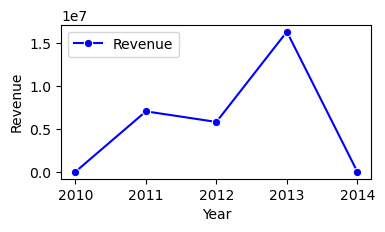

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns
# sns.regplot(data = annual_revenue, x= "Year", y = "UnitPrice")
plt.figure(figsize=(4, 2))
sns.lineplot(x='Year', y='UnitPrice', data=annual_revenue, marker='o', color='blue', label='Revenue')
plt.xticks(annual_revenue['Year'])
plt.xlabel('Year')
plt.ylabel('Revenue')

plt.show()

In [82]:
# Output records for Customer with FirstName "Sarah" and LastName "Henderson"
df_pandas[(df_pandas["FirstName"] == "Sarah") & (df_pandas["LastName"] == "Henderson")]

,ProductKey,CustomerKey,GeographyKey,CustomerAlternateKey,FirstName,LastName,NameStyle,BirthDate,MaritalStatus,Gender,...,TotalProductCost,SalesAmount,TaxAmt,Freight,CarrierTrackingNumber,CustomerPONumber,OrderDate,DueDate,ShipDate,EnglishProductName
1903,314,23867,66,AW00023867,Sarah,Henderson,False,23/09/1970,S,F,...,2171.2942,3578.27,286.2616,89.4568,NULL,NULL,2011-11-14,2011-11-26,2011-11-21,"Road-150 Red, 56"
47113,225,23867,66,AW00023867,Sarah,Henderson,False,23/09/1970,S,F,...,6.9223,8.99,0.7192,0.2248,NULL,NULL,2013-10-28,2013-11-09,2013-11-04,AWC Logo Cap
47114,560,23867,66,AW00023867,Sarah,Henderson,False,23/09/1970,S,F,...,755.1508,1214.85,97.1880,30.3713,NULL,NULL,2013-10-28,2013-11-09,2013-11-04,"Touring-2000 Blue, 60"


In [24]:
# Output mean of all numeric coloumns and show top 5 customers with highest net SalesAmount spend 
customers = df_pandas.groupby("CustomerKey")[df_pandas.select_dtypes(include ="number").columns].mean().sort_values(by = "SalesAmount", ascending = False)

customers.head(5)

,ProductKey,CustomerKey,GeographyKey,YearlyIncome,TotalChildren,NumberChildrenAtHome,HouseOwnerFlag,NumberCarsOwned,OrderDateKey,DueDateKey,...,OrderQuantity,UnitPrice,ExtendedAmount,UnitPriceDiscountPct,DiscountAmount,ProductStandardCost,TotalProductCost,SalesAmount,TaxAmt,Freight
CustomerKey,,,,,,,,,,,,,,,,,,,,,
28180,312.0,28180.0,609.0,60000.0,0.0,0.0,0.0,1.0,20110319.0,20110331.0,...,1.0,3578.27,3578.27,0.0,0.0,2171.2942,2171.2942,3578.27,286.2616,89.4568
28989,313.0,28989.0,545.0,30000.0,5.0,0.0,1.0,2.0,20110621.0,20110703.0,...,1.0,3578.27,3578.27,0.0,0.0,2171.2942,2171.2942,3578.27,286.2616,89.4568
28185,311.0,28185.0,301.0,60000.0,1.0,0.0,1.0,1.0,20110306.0,20110318.0,...,1.0,3578.27,3578.27,0.0,0.0,2171.2942,2171.2942,3578.27,286.2616,89.4568
28184,312.0,28184.0,345.0,60000.0,1.0,0.0,1.0,1.0,20110322.0,20110403.0,...,1.0,3578.27,3578.27,0.0,0.0,2171.2942,2171.2942,3578.27,286.2616,89.4568
28183,314.0,28183.0,301.0,60000.0,1.0,0.0,1.0,1.0,20110307.0,20110319.0,...,1.0,3578.27,3578.27,0.0,0.0,2171.2942,2171.2942,3578.27,286.2616,89.4568


In [14]:
# Creating a new DF and including an Age column from BirthDate and assinging numeric dtype
from datetime import datetime
df2 = df_pandas
df2["BirthDate"] = pd.to_datetime(df2["BirthDate"])
df2["Age"] = datetime.now() - df2["BirthDate"]
df2["Age"] = df2["Age"].astype('<m8[Y]').astype('int')
df2[["BirthDate", "Age"]]

C:\Windows\Temp\ipykernel_8484\2662817545.py:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df2["BirthDate"] = pd.to_datetime(df2["BirthDate"])


,BirthDate,Age
0,1946-08-22,77
1,1964-12-18,59
2,1946-03-12,77
3,1938-05-13,85
4,1968-02-15,55
...,...,...
60393,1971-06-13,52
60394,1971-06-13,52
60395,1978-11-02,45
60396,1978-11-02,45


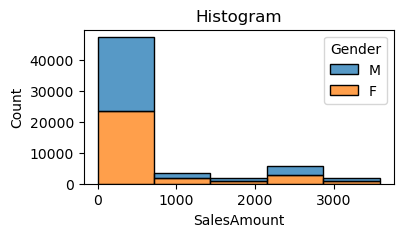

<Figure size 300x100 with 0 Axes>

In [115]:
plt.figure(figsize=(4, 2))
sns.histplot(data=df_pandas, x='SalesAmount', bins = 5, hue = "Gender", multiple="stack")
plt.title('Histogram')
plt.figure(figsize=(3, 1))
plt.show()

In [62]:
numbers = df2.select_dtypes(include = "object")
numbers.columns

Index(['CustomerAlternateKey', 'FirstName', 'LastName', 'MaritalStatus',
       'Gender', 'EmailAddress', 'EnglishEducation', 'SpanishEducation',
       'FrenchEducation', 'EnglishOccupation', 'SpanishOccupation',
       'FrenchOccupation', 'AddressLine1', 'Phone', 'DateFirstPurchase',
       'CommuteDistance', 'SalesOrderNumber', 'CarrierTrackingNumber',
       'CustomerPONumber', 'EnglishProductName'],
      dtype='object')

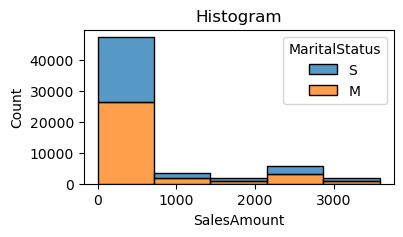

In [121]:
# Same on MaritalStatus
plt.figure(figsize=(4, 2))
sns.histplot(data=df_pandas, x='SalesAmount', bins = 5, hue = "MaritalStatus", multiple="stack")
plt.title('Histogram')
plt.show()

<Figure size 400x200 with 0 Axes>

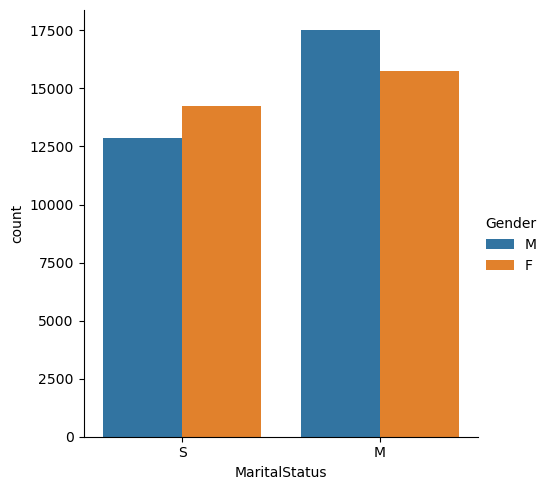

In [512]:
# Show distribution of MaritalStatus by Gender
plt.figure(figsize=(4, 2))
sns.catplot( data = df_pandas, x = "MaritalStatus", kind = "count", hue = "Gender")
plt.show()

<Figure size 400x200 with 0 Axes>

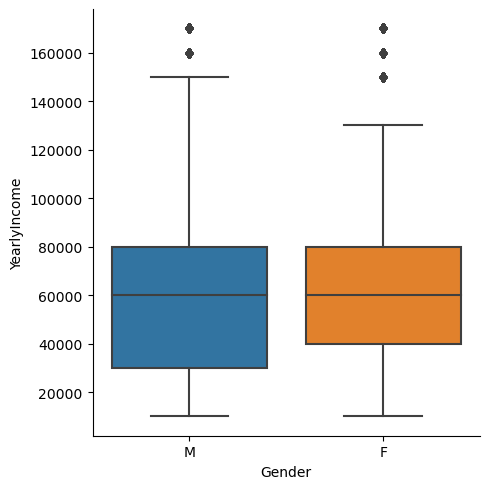

In [513]:
# Show boxplot of YearlyIncome to view outliers 
plt.figure(figsize=(4, 2))
sns.catplot(data = df_pandas, x = "Gender", y = "YearlyIncome", kind = "box")
plt.show()

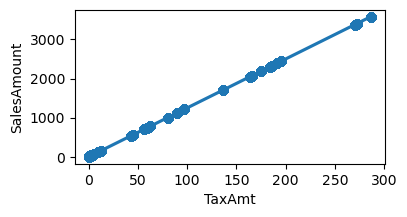

In [514]:
plt.figure(figsize=(4, 2))
sns.regplot(data = df_pandas, x= "TaxAmt", y = "SalesAmount")
plt.show()

##### Part 3: Linear Regression

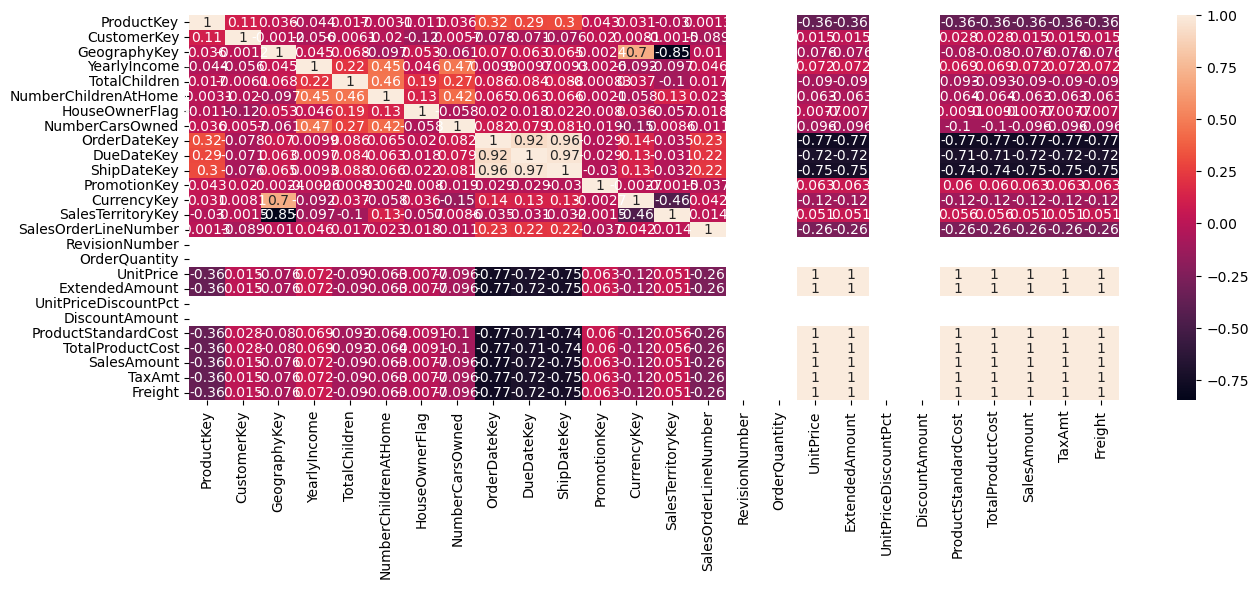

In [27]:
sns.heatmap(customers.corr(), annot = True)
plt.rcParams["figure.figsize"] = (10,7)

plt.show()

In [430]:
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.stat import Correlation
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

In [331]:
# To isolate umeric columns from DF
num_columns = ['ProductKey','CustomerKey','GeographyKey','YearlyIncome','TotalChildren','NumberChildrenAtHome','HouseOwnerFlag',
 'NumberCarsOwned','CurrencyKey','SalesTerritoryKey',"Gender", "MaritalStatus", "TaxAmt", "UnitPrice"]


int_columns = df_join2.select(*num_columns)
int_columns = int_columns.withColumn("Gender", when(int_columns["Gender"] == "M", 0).otherwise(1))
int_columns = int_columns.withColumn("MaritalStatus", when(int_columns["MaritalStatus"] == "S", 0).otherwise(1))

In [332]:
from pyspark.sql.functions import mean
grouped_columns = [col for col in int_columns.columns if col != 'CustomerKey']
# Perform groupBy and calculate mean for all columns
final_df = int_columns.groupBy("CustomerKey").agg(*[mean(col_name).alias(col_name) for col_name in grouped_columns])


In [333]:
int_columns.count()

60398

In [334]:
final_df.count()

18484

In [335]:
final_df.columns

['CustomerKey',
 'ProductKey',
 'GeographyKey',
 'YearlyIncome',
 'TotalChildren',
 'NumberChildrenAtHome',
 'HouseOwnerFlag',
 'NumberCarsOwned',
 'CurrencyKey',
 'SalesTerritoryKey',
 'Gender',
 'MaritalStatus',
 'TaxAmt',
 'UnitPrice']

In [363]:
# Grouping Product IDs
from pyspark.sql.functions import expr, round
final_df = final_df.withColumn("ProductGroup", round(expr("ProductKey / 100")) * 100)

In [408]:
features = final_df.drop('ProductGroup','ProductKey')

In [409]:
assembler = VectorAssembler( inputCols = features.columns, outputCol = "features")

In [410]:
output = assembler.transform(final_df)
data = output.select("features", "ProductGroup")

In [411]:
train_df, test_df = data.randomSplit([0.7, 0.3], seed = 43)

In [412]:
train_df.show()
test_df.show()

+--------------------+------------+
|            features|ProductGroup|
+--------------------+------------+
|(13,[0,1,2,7,8,11...|       400.0|
|(13,[0,1,2,7,8,11...|       400.0|
|(13,[0,1,2,7,8,11...|       500.0|
|(13,[0,1,2,7,8,11...|       500.0|
|(13,[0,1,2,7,8,11...|       500.0|
|(13,[0,1,2,7,8,11...|       500.0|
|(13,[0,1,2,7,8,11...|       400.0|
|(13,[0,1,2,7,8,11...|       400.0|
|(13,[0,1,2,7,8,11...|       400.0|
|(13,[0,1,2,7,8,11...|       500.0|
|(13,[0,1,2,7,8,11...|       500.0|
|(13,[0,1,2,7,8,11...|       400.0|
|(13,[0,1,2,7,8,11...|       400.0|
|(13,[0,1,2,7,8,11...|       500.0|
|(13,[0,1,2,7,8,11...|       500.0|
|(13,[0,1,2,7,8,11...|       500.0|
|(13,[0,1,2,7,8,11...|       500.0|
|(13,[0,1,2,7,8,11...|       400.0|
|(13,[0,1,2,7,8,11...|       500.0|
|(13,[0,1,2,7,8,11...|       400.0|
+--------------------+------------+
only showing top 20 rows

+--------------------+------------+
|            features|ProductGroup|
+--------------------+------------+
|(

In [413]:
lin_reg = LinearRegression(featuresCol = "features", labelCol = "ProductGroup")
linear_model = lin_reg.fit(train_df)

In [426]:
print( "Intercept ", linear_model.intercept)

Intercept  441.9406112143088


In [427]:
coefficients = pd.DataFrame(linear_model.coefficients.toArray(), columns=["Coefficients"])

# Assigning feature columns from model
columns = ['CustomerKey', 'GeographyKey', 'YearlyIncome', 'TotalChildren',
           'NumberChildrenAtHome', 'HouseOwnerFlag', 'NumberCarsOwned', 'CurrencyKey',
           'SalesTerritoryKey', 'Gender', 'MaritalStatus', 'TaxAmt', 'UnitPrice']
result_df = pd.DataFrame({"Attributes": columns, "Coefficients": coefficients["Coefficients"]})

result_df


,Attributes,Coefficients
0,CustomerKey,0.001200
1,GeographyKey,0.006057
2,YearlyIncome,-0.000020
3,TotalChildren,-0.319649
4,NumberChildrenAtHome,-0.684084
5,HouseOwnerFlag,-0.769954
6,NumberCarsOwned,1.235332
7,CurrencyKey,-0.094287
8,SalesTerritoryKey,-0.860071
9,Gender,-1.333579


In [416]:
trainSummary = linear_model.summary

r2_value = 0.11150827970057631
adjusted_r2 = 1 - ((1 - r2_value) * (n - 1) / (n - k - 1))
print("RMSE: ", trainSummary.rootMeanSquaredError)
print("r2 Score: ", trainSummary.r2)
print("Adjusted R Squared =", adjusted_r2)

RMSE:  65.662203314914
r2 Score:  0.11281010347012999
Adjusted R Squared = 0.11093105590957464


In [417]:
# Checking model with test data
prediction = linear_model.transform(test_df)
prediction.select("prediction", "ProductGroup", "features").show()

+------------------+------------+--------------------+
|        prediction|ProductGroup|            features|
+------------------+------------+--------------------+
| 446.4257319116266|       500.0|(13,[0,1,2,7,8,11...|
| 447.8576732467965|       500.0|(13,[0,1,2,7,8,11...|
|446.96827622160527|       500.0|(13,[0,1,2,7,8,11...|
| 448.9917502187517|       500.0|(13,[0,1,2,7,8,11...|
| 414.0170627706942|       300.0|(13,[0,1,2,7,8,11...|
| 442.6025851321866|       400.0|(13,[0,1,2,7,8,11...|
| 390.1432050568662|       400.0|(13,[0,1,2,7,8,11...|
| 439.5808944048633|       400.0|(13,[0,1,2,7,8,11...|
| 415.5424191828884|       400.0|(13,[0,1,2,7,8,11...|
|423.50410659877156|       500.0|(13,[0,1,2,7,8,11...|
| 446.3713461554025|       500.0|(13,[0,1,2,7,8,11...|
|460.51353693840787|       400.0|(13,[0,1,2,7,8,11...|
|434.21577516492147|       500.0|(13,[0,1,2,7,8,11...|
|428.65092530780515|       400.0|(13,[0,1,2,7,8,11...|
| 449.3360700330674|       400.0|(13,[0,1,2,7,8,11...|
|417.96566

In [418]:
prediction_evaluator = RegressionEvaluator(predictionCol = "prediction", labelCol = "ProductGroup", metricName = "r2")
print("R Squared (R2) on test data = ", prediction_evaluator.evaluate(prediction))

R Squared (R2) on test data =  0.11150827970057631


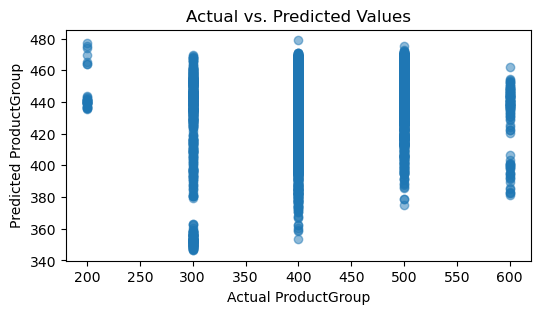

In [419]:
# Convert PySpark DataFrame to Pandas DataFrame for visualization
prediction_pd = prediction.select("ProductGroup", "prediction").toPandas()

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(4, 2))
plt.scatter(prediction_pd["ProductGroup"], prediction_pd["prediction"], alpha=0.5)
plt.title("Actual vs. Predicted Values")
plt.xlabel("Actual ProductGroup")
plt.ylabel("Predicted ProductGroup")
plt.show()

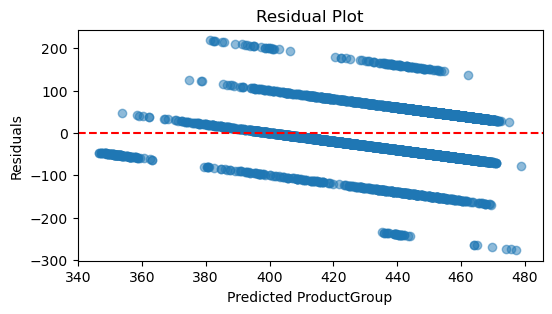

In [420]:
residuals = prediction_pd["ProductGroup"] - prediction_pd["prediction"]
plt.figure(figsize=(4, 2))
plt.scatter(prediction_pd["prediction"], residuals, alpha=0.5)
plt.title("Residual Plot")
plt.xlabel("Predicted ProductGroup")
plt.ylabel("Residuals")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

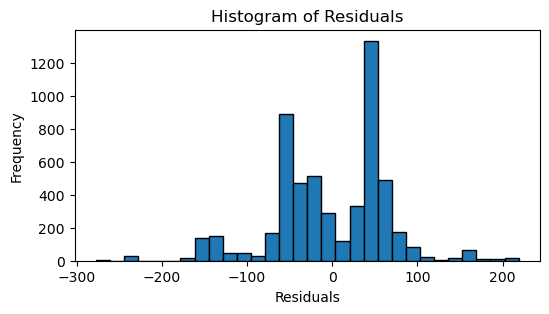

In [421]:
plt.figure(figsize=(4, 2))
plt.hist(residuals, bins=30, edgecolor='black')
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

##### Part 4: Logistic Regression

In [439]:
from pyspark.ml.classification import LogisticRegression

In [498]:
var_columns = ['GeographyKey', 'YearlyIncome', 'HouseOwnerFlag', 'NumberCarsOwned', 'Gender', 'MaritalStatus', 'TotalChildren']
var = int_columns.select(var_columns)

In [499]:
# Converting the "Children" column to binary
var = var.withColumn("Children", when(col("TotalChildren") >= 1, 1).otherwise(0))
var1 = var.drop("Children")

In [500]:
feature_columns = ['GeographyKey','YearlyIncome','HouseOwnerFlag','NumberCarsOwned','Gender','MaritalStatus']
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
var_data = assembler.transform(var)

In [501]:
(train_df, test_df) = var_data.randomSplit([0.7, 0.3], seed=12)

In [502]:
lr = LogisticRegression(featuresCol="features", labelCol="Children")
lr_model = lr.fit(train_df)

In [503]:
predictions = lr_model.transform(test_df)

# Showing the predictions
predictions.select("features", "Children", "prediction", "probability").show(truncate=False)


+-----------------------------+--------+----------+----------------------------------------+
|features                     |Children|prediction|probability                             |
+-----------------------------+--------+----------+----------------------------------------+
|[2.0,10000.0,0.0,1.0,1.0,0.0]|0       |0.0       |[0.6371048444405507,0.3628951555594493] |
|[2.0,10000.0,0.0,1.0,1.0,1.0]|0       |1.0       |[0.43726435579084477,0.5627356442091552]|
|[2.0,10000.0,1.0,2.0,0.0,1.0]|1       |1.0       |[0.23802822776214985,0.7619717722378502]|
|(6,[0,1],[2.0,20000.0])      |0       |0.0       |[0.6345195835710048,0.3654804164289952] |
|[2.0,20000.0,1.0,0.0,0.0,0.0]|0       |1.0       |[0.3958478764912777,0.6041521235087224] |
|[2.0,20000.0,1.0,0.0,0.0,1.0]|0       |1.0       |[0.22480376610743033,0.7751962338925696]|
|[2.0,20000.0,1.0,0.0,0.0,1.0]|0       |1.0       |[0.22480376610743033,0.7751962338925696]|
|[2.0,20000.0,1.0,0.0,0.0,1.0]|0       |1.0       |[0.2248037661074303

In [504]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Calculate the accuracy and area under ROC
evaluator_acc = MulticlassClassificationEvaluator(labelCol="Children", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator_acc.evaluate(predictions)

evaluator_auc = BinaryClassificationEvaluator(labelCol="Children", rawPredictionCol="rawPrediction", metricName="areaUnderROC")
area_under_roc = evaluator_auc.evaluate(predictions)

print(f"Accuracy: {accuracy:.4f}")
print(f"Area Under ROC: {area_under_roc:.4f}")

Accuracy: 0.7496
Area Under ROC: 0.6949


In [505]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from sklearn.metrics import classification_report

predictions_pd = predictions.select("Children", "prediction").toPandas()

# Extracting true labels and predictions
true_labels = predictions_pd["Children"].tolist()
predicted_labels = predictions_pd["prediction"].tolist()

# Generate classification report using scikit-learn
report = classification_report(true_labels, predicted_labels)

# Display the classification report
print(report)

              precision    recall  f1-score   support

           0       0.61      0.31      0.41      5101
           1       0.77      0.92      0.84     12954

    accuracy                           0.75     18055
   macro avg       0.69      0.62      0.63     18055
weighted avg       0.73      0.75      0.72     18055



In [515]:
spark.stop()